In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Probability distributions

One of the prime reasons for using probability distributions is to model the distribution of a random variable when having finite data. this is called *density estimation*. The chapter focusses on 3 parametric methods and ends with aa short discussion of 3 non-parametric methods

## Binary variable

When there are two outcomes where the probability of occuring is $\mu$ (and thus not occuring is $(1 - \mu)$ can be modelled using a bernoulli distribution

$$
    Bern(x|\mu) = \mu^x (1 - \mu)^{1 - x}
$$

And the mean an variance are given by

$$
    E[x] = 0 * (1 - \mu) + 1 * (\mu) = \mu \\
    Var[x] = E[x^2] - E[x]^2 = (0^ * (1 - \mu) + 1^ * (\mu)) + \mu^2 = \mu + \mu^2 = \mu * (1 - \mu)
$$

The entropy calculates a measurement of disparity and is given by 

$$
    H[x] = -\sum_{i=1}^{N} p(x_i) \; log(p(x_i)
$$

For the bernoulli distribution this is 

$$
    H[x] = - \mu \; log(\mu) - (1 - \mu) \; log(1 - \mu)
$$

In [2]:
entropy_bernoulli = lambda mu : -(mu * np.log(mu)) - (1 - mu) * np.log(1 - mu)

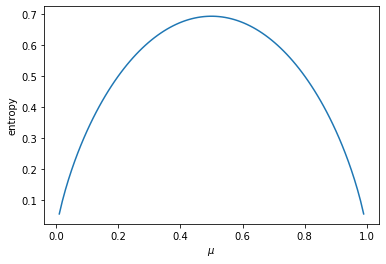

In [3]:
mus = np.linspace(0.01, 0.99, 100)
plt.plot(mus, list(map(entropy_bernoulli, mus)))
plt.xlabel(r'$\mu$')
plt.ylabel('entropy')
plt.show()

This indeed shows that when the probability of occuring is 50% the entropy is highest. An example random variable with the bernoulli distribution is given as follows

In [4]:
from scipy import stats

In [5]:
bernoulli = stats.bernoulli(0.25) # So we zet the parameter mean to 0.25

sample = bernoulli.rvs(100)

In the frequentist paradigm you can estimate this parameter $\mu$ by taking the maximmum of the negative log likelihood of the data 

$$
    p(D|\mu) = \prod_{i=0}^{N}p(x_i|\mu) \\
    \sum_{n=1}^N x_n ln \mu + (1 - x_n) ln (1 - \mu) \\
    \text{Set the derivative wrt mu and set to zero} \\
    \sum_{n=1}^N \frac{x}{\mu} - \frac{(1 - x)}{(1 - \mu)} = 0 \\
    \mu_{ML} = \frac{1}{N} \sum_{n=1}^N x_n
$$

So the maximum likelihood of the probability of an effect occuring is the number of times it occured divided by the number of occurences

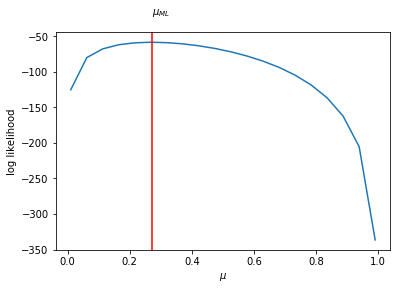

In [6]:
loglikelihood = lambda x, mu: (x * np.log(mu)) + ((1 - x) * np.log(1 - mu))

loglikelihoods = []

for mu in np.linspace(0.01, 0.99, 20):
    loglikelihoods.append(np.sum(list(map(loglikelihood, sample, np.ones(sample.size) * mu))))

u_ml = (1 / sample.size) * sample.sum()

plt.plot(np.linspace(0.01, 0.99, 20), loglikelihoods)
plt.axvline(u_ml, c='r')
plt.text(u_ml, -20, s=r'$\mu_{ML}$')
plt.xlabel(r'$\mu$')
plt.ylabel('log likelihood')
plt.show()

# Sequential modelling using Bernoulli distribution

One disadvantage of using the maximum likelihood of a bernoulli is that you overfit like crazy when data is small. Another disadvantage is that you cannot update your beliefs about what the value of $\mu$ should be. You can overcome this by picking a good prior for the Bernoulli distribution, which is the beta distribution

$$
    \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a - 1}(1 - \mu)^{b -1}
$$

Note that this has the same form as the bernoulli, except for the normalization constant in front. For calculating the posterior we need to multiply the likelihood (the bernoulli) with the prior which gives the prob of the parameters of that likelihood function (the beta function in this case). If you multiply the two distributions and normalize using the normalizing constant you get a new beta distribution looking as follows

$$
    p(\mu| m, l, a, b) = \frac{\Gamma(m + a + l + b)}{\Gamma(m + a)\Gamma(l + b)}\mu^{m + a - 1}(1 - \mu)^{l + b -1}
$$

where we denote $l = N - m$, i.e. the number of times we have found tails. Note that finding the posterior this way requires us the only update a or b everytime and set that new distribution as our prior. Lets model this sequential process using some mock data where we start with a uniformative prior, namely $a = 2$ and $b = 2$. Lets say we have a coin and we are going to flip it 3 times and all the 3 times it threw head, i.e. $x_i=1$

In [17]:
from scipy.stats import beta, bernoulli

In [147]:
#X = np.array([1, 1, 1])
X = np.random.uniform(0, 1, 20000)
X = (X < 0.70).astype(np.uint8)

In [148]:
# The maximum likelihood approach is picking the number of heads and dividing by the number of datapoints
mu_mle = X.sum() / X.size

print(f'MLE for this trial is : {mu_mle}')

MLE for this trial is : 0.7064


In [149]:
# New let's assume the next item is tails, 
x_new = 0

print(f'Probability of throwing tails  = {bernoulli(p=mu_mle).pmf(0)}')

Probability of throwing tails  = 0.29359999999999997


In [150]:
# This is a serious case of overfitting, now lets try the sequential Bayes approach
a = b = 2
updates = []

for x_i in X:
    #updates.append(beta(a=a, b=b).pdf(np.linspace(0, 1, 100)))
    
    if x_i == 1: # See derivation above
        a += 1
    else:
        b += 1

[]

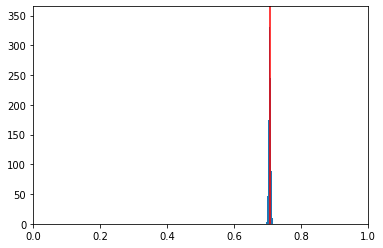

In [151]:
plt.hist(beta(a, b).rvs(10000), bins=100)
plt.axvline(mu_mle, c='r')
plt.xlim(0, 1)
plt.plot()

Note the X axis, this is very much centered around 0.70. This shows that given sufficient data the prediction
of the bayesian method approaches the MLE method. This is very common